## Attempt to find the right function to determine death rate according to Age and Gender

### Using the data from Italy up to 26 March 2020

In [35]:
import pandas as pd
import numpy as np

In [2]:
males_df = pd.read_csv('../data/italy_male_deaths.csv')
females_df = pd.read_csv('../data/italy_female_deaths.csv')

In [2]:
males_df['death_rate'] = males_df['num_deaths'] / males_df['num_cases']
females_df['death_rate'] = females_df['num_deaths'] / females_df['num_cases']

### Linear Regression

#### Males

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

male_deathrates = males_df['death_rate'].to_numpy().reshape(-1, 1)
x_vals = np.array(list(range(len(males_df)))).reshape(-1, 1)

mdr_linreg = LinearRegression().fit(x_vals, male_deathrates)
mdr_linreg_preds = mdr_linreg.predict(x_vals)
mdr_linreg_score = mdr_linreg.score(x_vals, male_deathrates)

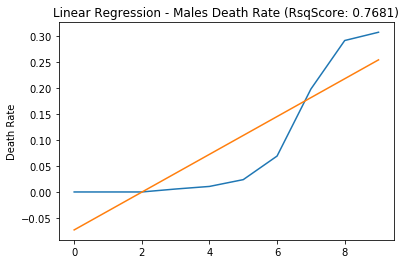

In [4]:
import matplotlib.pyplot as plt

plt.plot(male_deathrates[:, 0])
plt.plot(mdr_linreg_preds[:, 0])
plt.title('Linear Regression - Males Death Rate (RsqScore: %.4f)' % mdr_linreg_score)
plt.ylabel('Death Rate')
plt.show()

#### Females

In [5]:
female_deathrates = females_df['death_rate'].to_numpy().reshape(-1, 1)
x_vals = np.array(list(range(len(females_df)))).reshape(-1, 1)

fdr_linreg = LinearRegression().fit(x_vals, female_deathrates)
fdr_linreg_preds = fdr_linreg.predict(x_vals)
fdr_linreg_score = fdr_linreg.score(x_vals, female_deathrates)

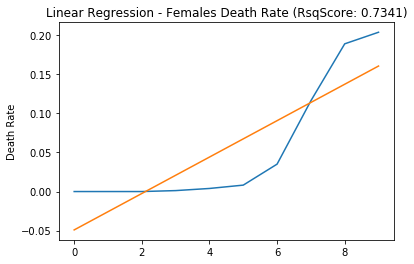

In [6]:
plt.plot(female_deathrates[:, 0])
plt.plot(fdr_linreg_preds[:, 0])
plt.title('Linear Regression - Females Death Rate (RsqScore: %.4f)' % fdr_linreg_score)
plt.ylabel('Death Rate')
plt.show()

### Linear Regression forcing Non-Negative Values

In [7]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

#### Males

In [8]:
new_mdr_linreg_preds = np.zeros(mdr_linreg_preds.shape)
for i in range(len(mdr_linreg_preds)):
    if mdr_linreg_preds[i][0] < 0:
        new_mdr_linreg_preds[i][0] = 0
    else:
        new_mdr_linreg_preds[i][0] = mdr_linreg_preds[i][0]
        
new_mdr_linreg_score = coefficient_of_determination(male_deathrates, new_mdr_linreg_preds)

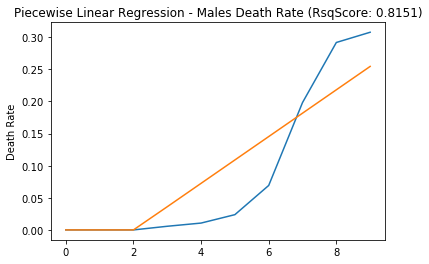

In [9]:
plt.plot(male_deathrates[:, 0])
plt.plot(new_mdr_linreg_preds[:, 0])
plt.title('Piecewise Linear Regression - Males Death Rate (RsqScore: %.4f)' % new_mdr_linreg_score[0])
plt.ylabel('Death Rate')
plt.show()

#### Females

In [10]:
new_fdr_linreg_preds = np.zeros(fdr_linreg_preds.shape)
for i in range(len(fdr_linreg_preds)):
    if fdr_linreg_preds[i][0] < 0:
        new_fdr_linreg_preds[i][0] = 0
    else:
        new_fdr_linreg_preds[i][0] = fdr_linreg_preds[i][0]
        
new_fdr_linreg_score = coefficient_of_determination(female_deathrates, new_fdr_linreg_preds)

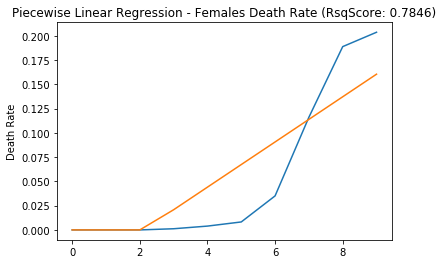

In [11]:
plt.plot(female_deathrates[:, 0])
plt.plot(new_fdr_linreg_preds[:, 0])
plt.title('Piecewise Linear Regression - Females Death Rate (RsqScore: %.4f)' % new_fdr_linreg_score[0])
plt.ylabel('Death Rate')
plt.show()

### Linear Regression with Polynomial of Degree 2

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(5)

#### Males

In [28]:
x_vals_poly = poly_2.fit_transform(x_vals)

mdr_linreg2 = LinearRegression().fit(x_vals_poly, male_deathrates)
mdr_linreg2_preds = mdr_linreg2.predict(x_vals_poly)
mdr_linreg2_score = mdr_linreg2.score(x_vals_poly, male_deathrates)

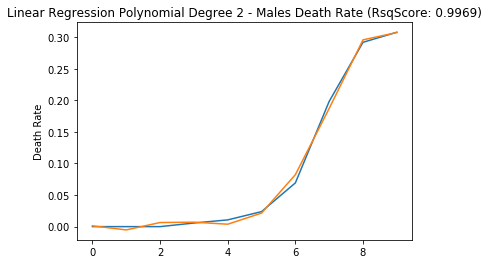

In [29]:
plt.plot(male_deathrates[:, 0])
plt.plot(mdr_linreg2_preds[:, 0])
plt.title('Linear Regression Polynomial Degree 2 - Males Death Rate (RsqScore: %.4f)' % mdr_linreg2_score)
plt.ylabel('Death Rate')
plt.show()

#### Females

In [15]:
fdr_linreg2 = LinearRegression().fit(x_vals_poly, female_deathrates)
fdr_linreg2_preds = fdr_linreg2.predict(x_vals_poly)
fdr_linreg2_score = fdr_linreg2.score(x_vals_poly, female_deathrates)

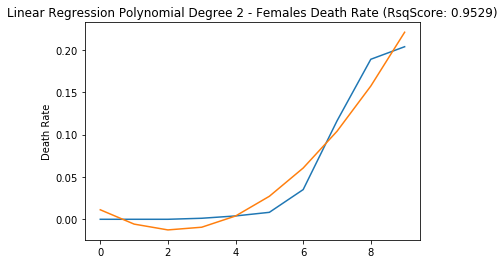

In [16]:
plt.plot(female_deathrates[:, 0])
plt.plot(fdr_linreg2_preds[:, 0])
plt.title('Linear Regression Polynomial Degree 2 - Females Death Rate (RsqScore: %.4f)' % fdr_linreg2_score)
plt.ylabel('Death Rate')
plt.show()

### Softmax Implementation

In [17]:
from scipy.special import softmax

s = softmax(male_deathrates) * 10 - 0.9

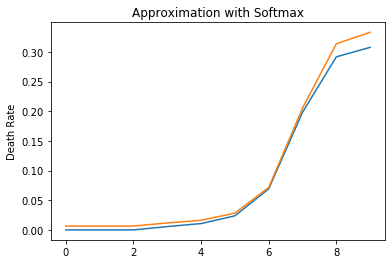

In [18]:
plt.plot(male_deathrates[:, 0])
plt.plot(s[:, 0])
plt.title('Approximation with Softmax')
plt.ylabel('Death Rate')
plt.show()

### Sigmoid

In [44]:
from scipy.optimize import curve_fit

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_to_optimize(x, a, b):
    return sigmoid(x + a) * b

[-9.58814632  0.61453804]


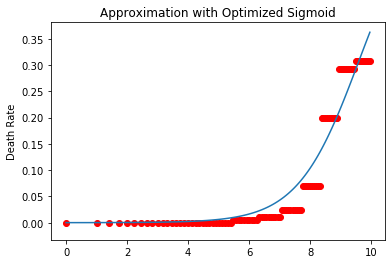

In [51]:
male_drs = []
for i in range(100):
    male_drs.append(males_df['death_rate'][i // 10])
    
x_vals = np.sqrt(list(range(100)))
y_vals = male_drs

popt, pcov = curve_fit(sigmoid_to_optimize, x_vals, y_vals)

print(popt)

y = sigmoid_to_optimize(x_vals, popt[0], popt[1])

plt.scatter(x_vals, male_drs, color='red')
plt.plot(x_vals, y)
plt.title('Approximation with Optimized Sigmoid')
plt.ylabel('Death Rate')
plt.show()

[-9.91023535  0.47451181]


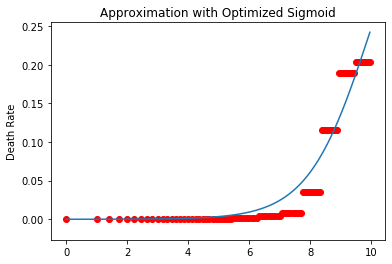

In [49]:
female_drs = []
for i in range(100):
    female_drs.append(females_df['death_rate'][i // 10])
    
x_vals = np.sqrt(list(range(100)))
y_vals = female_drs

popt, pcov = curve_fit(sigmoid_to_optimize, x_vals, y_vals)

print(popt)

y = sigmoid_to_optimize(x_vals, popt[0], popt[1])

plt.scatter(x_vals, female_drs, color='red')
plt.plot(x_vals, y)
plt.title('Approximation with Optimized Sigmoid')
plt.ylabel('Death Rate')
plt.show()

### Increment data based on camp params

In [21]:
camp_params = pd.read_csv("../data/camp_params.csv")
age_df = pd.read_csv("../data/age_and_sex.csv")

In [55]:
age_df.head()

,Unnamed: 0,V1,V2
0,1,2.1,1
1,2,25.6,0
2,3,23.6,0
3,4,49.6,1
4,5,28.6,0


In [4]:
camp_params.head()

,Camp,Age,p_symptomatic,Hosp_given_symptomatic,Critical_given_hospitalised,Population_structure,Total_population,Notes:,Rough prob symptomatic case becomes critical (just multiplying),Rough exp. no. critical
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Moria,0-9,0.40,0.76,30.0,21.05,18700.0,p_sympt from,0.000912,2.692908001
2,Moria,10-19,0.25,0.81,30.0,17.34,NaN,"Table 1, Source 2",0.0006075,1.47713625
3,Moria,20-29,0.37,0.99,30.0,26.35,NaN,NaN,0.0010989,4.061534401
4,Moria,30-39,0.42,1.85,30.0,17.16,NaN,Hosp/Crit data from,0.002331,5.608385999


In [47]:
# Get the age ranges and their respective prevalence in the camp
age_ranges = list(camp_params["Age"].iloc[1:9])
age_prevalence = list(camp_params["Population_structure"].iloc[1:9]/100)

In [76]:
# Get the sex prevalence given the data in the age_sex csv --> Reversed because 1 has a higher probability than 0
sex_prevalence = list(age_df["V2"].value_counts()/len(age_df["V2"]))[::-1]

In [77]:
sex_prevalence

[0.4581231079717457, 0.5418768920282543]

In [48]:
# Set up augmentation parameters
old_pop = len(age_df)
new_pop = 18700
diff_pop = new_pop - old_pop

In [80]:
new_pop_ranges = np.random.choice(range(len(age_ranges)), p=age_prevalence, size=diff_pop, replace=True)
new_pop_sex = np.random.choice([0, 1], p=sex_prevalence, size=diff_pop, replace=True)
new_pop_ages = []

# For every new member 
for i in range(diff_pop):
    
    # Get the age range of the selected new person 
    age_range = age_ranges[new_pop_ranges[i]].split("-")
    
    # Check if the range is 70+ --> Upper bound is currently 90
    if "70+" in age_range:
        person_age = np.random.choice(range(70, 90))
    else:
        person_age = np.random.choice(range(int(age_range[0]), int(age_range[1]) + 1))
    
    new_pop_ages.append(person_age)

In [104]:
np.array(new_pop_ages), np.array(new_pop_sex)

(array([ 1, 16, 10, ..., 23, 21, 13]), array([0, 0, 1, ..., 0, 1, 1]))

In [128]:
new_rows = [{"V1": a, "V2": s} for a, s in zip(new_pop_ages, new_pop_sex)]

In [129]:
len(new_rows)

5817

In [130]:
age_df.append(new_rows, ignore_index=True)

,V1,V2
0,2.1,1
1,25.6,0
2,23.6,0
3,49.6,1
4,28.6,0
5,22.6,0
6,44.6,0
7,26.1,0
8,28.1,1
9,35.6,1


In [111]:
age_df

,V1,V2
0,2.1,1
1,25.6,0
2,23.6,0
3,49.6,1
4,28.6,0
5,22.6,0
6,44.6,0
7,26.1,0
8,28.1,1
9,35.6,1
